In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv("Pdo_response.csv")

We want to plot a diagram of position and load cell voltage (correlated to force). store the the data in a n*2 list.
Cluter the data within the same time interval into groups 

In [14]:
idx_1FF = 0
idx_2FF = 1
idx_3FF = 2
idx_4FF = 3
pos_and_vol_CAN_data = []
visited_indicies = []
# loop the data frame
for i in range(len(df)):
    match df.loc[i][2]:
        case '1FF':
            idx_1FF = i
        case '2FF':
            idx_2FF = i
        case '3FF':
            idx_3FF = i
        case '4FF':
            idx_4FF = i
    # check the distance 
    data_pair =  [df.loc[idx_1FF][4],df.loc[idx_4FF][4]]
    if abs(df.loc[idx_1FF][1]-df.loc[idx_4FF][1])<15 and [idx_1FF,idx_4FF] not in visited_indicies: 
        pos_and_vol_CAN_data.append(data_pair)
        visited_indicies.append([idx_1FF,idx_4FF])

Now convert the CAN data into number 

In [15]:
temp_str = ""
for i in range(len(pos_and_vol_CAN_data)):
    # convert the can message to position in hex 
    pos_and_vol_CAN_data[i][0] = pos_and_vol_CAN_data[i][0].replace(" ","")
    pos_and_vol_CAN_data[i][0] = pos_and_vol_CAN_data[i][0][0:8]
    temp_str += pos_and_vol_CAN_data[i][0][6:8]
    temp_str += pos_and_vol_CAN_data[i][0][4:6]
    temp_str += pos_and_vol_CAN_data[i][0][2:4]
    temp_str += pos_and_vol_CAN_data[i][0][0:2]
    pos_and_vol_CAN_data[i][0] = temp_str
    temp_str = ""
    
    
    pos_and_vol_CAN_data[i][1] = pos_and_vol_CAN_data[i][1].replace(" ","")
    pos_and_vol_CAN_data[i][1] = pos_and_vol_CAN_data[i][1][0:4]
    temp_str += pos_and_vol_CAN_data[i][1][2:4]
    temp_str += pos_and_vol_CAN_data[i][1][0:2]
    pos_and_vol_CAN_data[i][1] = temp_str
    temp_str = ""

# store the data in integer in the new python list 
pos_and_vol_int_data = []
for i in range(len(pos_and_vol_CAN_data)):
    pos = int(pos_and_vol_CAN_data[i][0],base = 16)
    vol = int(pos_and_vol_CAN_data[i][1],base = 16)
    pos_and_vol_int_data.append([pos,vol])

Filter out the FFFFFFFF value

In [16]:
pos_and_vol_int_data_filter = []
for i in range(len(pos_and_vol_int_data)):
    if pos_and_vol_int_data[i][0] >= 1000000000:
        if i > len(pos_and_vol_int_data)/2:
            break
        else:
            continue
    pos_and_vol_int_data_filter.append(pos_and_vol_int_data[i])


Plot the result 

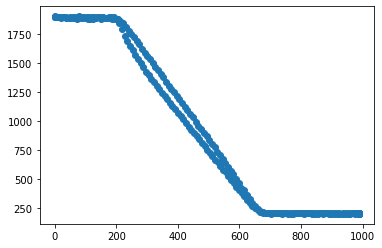

In [17]:
pos_and_vol_int_data_filter = np.array(pos_and_vol_int_data_filter)
plt.scatter(pos_and_vol_int_data_filter.transpose()[0],pos_and_vol_int_data_filter.transpose()[1])